# 6장.텍스트와 시퀀스를 위한 딥러닝
- 시퀀스 데이터, 텍스트, 시계열
- `순환신경망(recurrent neural network)`, `1D 컨브넷(1D convnet)`
- 활용 애플리케이션
  - 문서 분류나 시계열 분류 - 글의 주제나 책의 저자 식별하기
  - 시계열 비교 - 두 문서나 두 주식 가격이 얼마나 밀접하게 관련이 있는지 추정하기
  - 시퀀스-투-시퀀스 학습 - 영어 문장을 프랑스어로 변환하기
  - 감성 분석 - 트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기
  - 시계열 예측 - 어떤 지역의 최근 날씨 데이터가 주어졌을 때 향후 날씨 예측하기

## 6.1 텍스트 데이터 다루기
- `텍스트 벡터화(vectorizing text)` : 텍스트를 수치형 텐서로 변환하는 과정
  - 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환한다.
  - 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환한다.
  - 텍스트에서 단어나 문자의 `n-그램`을 추출하여 각 n-그램을 하나의 벡터로 변환한다. n-그램은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출한다.

- `토큰(token)` : 텍스트를 나누는 단위(단어, 문자, n-그램)
- `토큰화(tokenization)` : 텍스트를 토큰으로 나누는 작업
- 토큰과 벡터를 연결하는 방법
  - `원-핫 인코딩(one-hot encoding)`
  - `토큰 임베딩(token embedding)`, `단어임베딩(word embedding)`

- n-그램
  - 문장에서 추출한 N개(또는 그 이하)의 연속된 단어 그룹.
  - BoW(Bag-of-Words) : 다루고자 하는 대상이 시퀀드가 아니라 집합이다. 즉, 순서가 없는 토큰화 방법이기 때문에 딥러닝 모델보다 얕은 학습 방법의 언어 처리 모델에서 사용하는 일종의 특성공학으로 이해할 수 있다.

### 6.1.1 단어와 문자의 원-핫 인코딩
- 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N인 이진 벡터로 변환한다. 이 벡터는 i번째 원소만 1이고 나머지는 모두 0입니다.

In [ ]:
# 6-1 "단어" 수준의 원-핫 인코딩하기 (간단한 예)
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.'] #초기 데이터: 각 원소가 샘플이다.(각 원소는 하나의 문장이다.)

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1 #단어마다 고유한 인덱스를 부여한다. 인덱스 0은 사용하지 않는다.(관례산 단어가 아닌 토큰을 위해 0을 남겨둔다.)

max_length = 10 # 각 샘플에서 max_length 단어까지만 사용. 

results = np.zeros(shape = (len(samples), max_length, max(token_index.values())+1)) # 결과를 저장할 배열

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]: 
    index = token_index.get(word)
    results[i,j,index] = 1.


In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [ ]:
list(enumerate(sample.split()))[:max_length]

[(0, 'The'), (1, 'dog'), (2, 'ate'), (3, 'my'), (4, 'homework.')]

In [ ]:
# 6-2 "문자" 수준 원-핫 인코딩하기(간단한 예)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))

for i, sample in enumerate(samples):
  for j, character in list(enumerate(sample.split()))[:max_length]: 
    index = token_index.get(character)
    results[i,j,index] = 1.


In [ ]:
# 6-3 케라스를 사용한 단어 수준의 원-핫 인코딩하기 (케라스 유틸리티 사용)
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 1000) # 가장 빈도가 높은 1000개의 단어만 선택하도록 Tokenizer 객체를 만든다.
tokenizer.fit_on_texts(samples) # 단어 인덱스의 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환
one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary') # 직접 원-핫 이진 벡터 표현을 얻을 수 있다.
word_index = tokenizer.word_index # 계산된 단어 인덱스를 구한다.
print("%s개의 고유한 토큰을 찾았습니다."%len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [ ]:
print(one_hot_results.shape)
one_hot_results

(2, 1000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

**원-핫 해싱(one-hot hashing)**
- 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용
- 각 단어에 명시적으로 인덱스를 할당, 이 인덱스를 딕셔너리로 저장하지 않고, 단어를 해싱하여 고정된 크기의 벡터로 변환함.
- 명시적인 단어 인덱스가 필요없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있다.(전체 데이터를 확인하지 않고 토큰 생성이 가능하다)
- **해시 충돌(hash collision)** 
  - 2개의 단어가 같은 해시를 만들면 머신 러닝 모델은 이를 구분하지 못하다.
  - 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해시 충돌의 가능성은 감소한다.

In [ ]:
# 해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기(간단한 예)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000 # 단어를 크기가 1000인 벡터로 저장
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(sample):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality # 단어를 해싱하여 0과 1000 사이의 랜던함 정수 인덱스로 변환한다.
    results[i,j,index] = 1

In [ ]:
print(results.shape)
results

(2, 10, 1000)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 6.1.2 단어 임베딩 사용하기
- 단어 임베딩, 밀집 단어 벡터(word vector)
- 원-핫 인코딩으로 만등 벡터는 희소(sparse)하고 고차원이다. 반면 단어 임베딩은 저차원의 실수형 벡터이다.
- 데이터로 부터 학습한다.

- 만드는 두 가지 방법
  - (문서 분류나 감성 예측 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습한다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습한다.
  - 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드한다. 이를 `사전 훈련된 단어 임베딩(pretrained word embedding)`이라 한다.

**Embedding 층을 사용하여 단어 임베딩 학습하기**
- 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것 
  - (문제점) 임베딩 공간이 구조적이지 않다.
  - (ex) 비슷한 의미를 가진 단어가 완전히 다른 임베딩을 가질 수 있다. 심층 신경망은 이것을 학습하기 어렵다.

- 단어 사이에 있는 의미 관계를 반영해야 한다.
  - 단어 임베딩: 언어를 기하학적 공간에 매핑하는 것
  - 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 임베딩될 것.
  - 두 단어 사이의 거리와 방향은 단어의 의미와 관계되어 있다.
  - 실제로 좋은 단어 임베딩 공간을 만드는 것은 문제에 따라 크게 달라진다.
  - 새로운 잡업에는 새로운 임베딩을 학습하는 것이 타당하고, 역전파를 이용하여 쉽게 만들 수 있다. Embedding 층의 가중치를 학습한다.



- Embedding 층 개요
  1. (samples, sequence_length)인 2D 정수 텐서를 입력으로 받는다. 각 샘플은 정수의 시퀀스이고, 가변 길이의 시퀀스를 임베딩할 수 있다.
  2. 배치에 있는 모든 시퀀스는 길이가 같아야 하므로(하나의 텐서에 담아야 한다) 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘린다.
  3. (samples, sequence_length, enbedding_dimensionality)인 3D실수형 텐서를 반환한다.
  4. 이렇게 반환된 텐서는 RNN층이나 1D합성곱 층에서 처리된다. 

  - 객체 생성 시 가중치는 다른 층과 마찬가지로 랜덤하고 초기화된다. 훈련하면서 이 단어 벡트는 역전파를 통해 점차 조정되고, 임베딩 공간을 구성하게 된다. 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가지게 된다.

In [ ]:
# Embedding 층의 객체 생성하기
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)

**pad_sequences**
- 아래의 코드에서는 20개의 단어만 사용하기 때문에 생략되었지만, padding 매개변수가 존재하여 왼쪽(pre)과 오른쪽(post)에 padding을 추가할 수 있다.

In [ ]:
# Embedding 층에 사용할 IMDB 데이터 로드하기
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 20 # 사용할 텍스트의 길이 (가장 빈펀한 max_features개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) # 정수 리스트로 데이터 로드

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen) # 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

**Embedding**
- 나중에 임베딩된 임력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정한다. 
- Embedding 층에 input_length를 지정하지 않으면 출력 텐서의 차원이 (None, None, 8)이 된다. Flatten 층을 사용하려면 첫 번째 배치 차원을 제외하고 나머지 차원이 결정되야 하므로 input_length를 지정하여 (None, maxlen, 8)로 만든다. 
- Embedding 층의 출력 크기는 (samples,maxlen, 8)이 된다.

In [ ]:
# IMDB 데이터에 Embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten()) # 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼친다.

model.add(Dense(1, activation = 'sigmoid')) # 분류기를 추가한다.
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


검증데이터에서 약 75% 정도의 검증 정확도가 나온다. 하지만 임베딩 시퀀스를 펼치고 하나의 Dense층을 훈련했기 때문에 각 단어를 독립적으로 다우었다. 즉, 단어 사이의 관계나 문장 구조를 고려하지 않았다. 각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위해 순환 층이나 1D합성곱 층을 추가하는 것이 좋다.

In [ ]:
history = model.fit(x_train, y_train, epochs =10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6704 - acc: 0.6255 - val_loss: 0.6262 - val_acc: 0.6834
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5485 - acc: 0.7478 - val_loss: 0.5310 - val_acc: 0.7248
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4637 - acc: 0.7872 - val_loss: 0.5018 - val_acc: 0.7434
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4215 - acc: 0.8109 - val_loss: 0.4942 - val_acc: 0.7558
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3922 - acc: 0.8238 - val_loss: 0.4934 - val_acc: 0.7558
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3689 - acc: 0.8364 - val_loss: 0.4965 - val_acc: 0.7558
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3475 - acc: 0.8508 - val_loss: 0.5041 - val_acc: 0.7542
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

**사전 훈련된 단어 임베딩 사용하기**
- 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요할 때, 다른 문제에서 학습한 특성을 재사용하는 것이 합리적이다. 
- `Word2vec`, `Glove`


### 6.1.3 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지


In [1]:
!pwd
!git clone https://github.com/rickiepark/deep-learning-with-python-notebooks.git   # 다운 받을 깃허브 clone 링크
!git pull  # 저장소에서 변경 사항을 가져오기 위한
!ls

/content
Cloning into 'deep-learning-with-python-notebooks'...
remote: Enumerating objects: 123973, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 123973 (delta 8), reused 47 (delta 7), pack-reused 123922
Receiving objects: 100% (123973/123973), 717.29 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Checking out files: 100% (104042/104042), done.
fatal: not a git repository (or any of the parent directories): .git
deep-learning-with-python-notebooks  drive  sample_data


**원본 IMDB 텍스트 내려받기**

In [ ]:
import os

imdb_dir = '/content/deep-learning-with-python-notebooks/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding = 'utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

**데이터 토큰화**
- 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용함.
- 이 예제에서는 훈련 데이터를 처음 200개로 제한함.

In [ ]:
# IMDB 원본 데이터의 텍스트를 토큰화하기
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 앞의 100개 단어만 사용
training_samples = 200 # 훈련 데이터 200개
validation_samples = 10000 # 검증 데이터 10000개
max_words = 10000 # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' %len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) # padding
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


**GloVe 단어 임베딩 내려받기**

In [ ]:
# 파일 이동
import os, shutil
shutil.copyfile('/content/drive/MyDrive/2022-1/숙탯/케라스 창시자에게 배우는 딥러닝 code/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837/glove.6B.100d.txt', '/content/deep-learning-with-python-notebooks/datasets/glove.6B.100d.txt')
shutil.copyfile('/content/drive/MyDrive/2022-1/숙탯/케라스 창시자에게 배우는 딥러닝 code/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837/glove.6B.200d.txt', '/content/deep-learning-with-python-notebooks/datasets/glove.6B.200d.txt')
shutil.copyfile('/content/drive/MyDrive/2022-1/숙탯/케라스 창시자에게 배우는 딥러닝 code/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837/glove.6B.300d.txt', '/content/deep-learning-with-python-notebooks/datasets/glove.6B.300d.txt')
shutil.copyfile('/content/drive/MyDrive/2022-1/숙탯/케라스 창시자에게 배우는 딥러닝 code/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837/glove.6B.50d.txt', '/content/deep-learning-with-python-notebooks/datasets/glove.6B.50d.txt')


'/content/deep-learning-with-python-notebooks/datasets/glove.6B.50d.txt'

In [ ]:
# Glove 단어 임베딩 파일 파싱하기
glove_dir = '/content/deep-learning-with-python-notebooks/datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8') #40만 개의 단어에 대한 100차원의 임베딩 벡터를 포함
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다. ' %len(embeddings_index))

400001개의 단어 벡터를 찾았습니다. 


In [ ]:
embeddings_index.get('prison') # ex

array([ 0.86314 ,  0.12935 , -0.31712 , -0.39223 ,  0.42253 ,  1.242   ,
       -0.36284 ,  0.7589  , -0.59744 ,  0.98381 , -0.41836 ,  1.0276  ,
       -0.63542 ,  1.0982  ,  0.094746,  0.026594,  0.50524 , -1.0874  ,
       -0.72091 ,  0.036312,  0.70816 , -0.025736,  0.075821,  0.021067,
       -0.43555 ,  0.059536, -0.032682, -1.3708  ,  0.36555 ,  1.1512  ,
        0.6849  , -0.75306 , -0.3662  , -0.05774 , -0.055421,  0.60565 ,
       -0.44086 , -0.4251  ,  0.3701  , -0.31959 , -0.2827  , -0.44902 ,
        0.74597 ,  0.024362,  0.50921 ,  0.14636 ,  0.56209 , -0.51742 ,
        0.4382  ,  0.49828 ,  0.22301 , -1.4558  ,  0.087331,  1.7596  ,
       -0.37007 , -1.3982  , -0.016184, -1.0059  ,  1.6228  ,  0.64449 ,
       -0.608   ,  0.14222 , -0.75322 , -1.0962  ,  0.68042 ,  0.019071,
        0.49995 ,  0.093304, -0.38055 ,  1.2097  ,  0.038779, -0.20505 ,
       -0.090177,  0.10075 , -0.079859,  0.45471 ,  0.5807  , -0.05621 ,
       -0.38867 ,  0.53159 ,  0.89746 ,  0.13347 , 

In [ ]:
# GloVe 단어 임베딩 행렬 준비하기
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0이 된다.

**모델 정의하기**

In [ ]:
# 모델 정의하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                320032    
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


**모델에 GloVe 임베딩 로드하기**

In [ ]:
# 사전 훈련된 단어 임베딩을 Embedding 층에 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # 동결

**모델 훈련과 평가**

In [ ]:
# 훈련 및 평가
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 247ms/step - loss: 1.6507 - acc: 0.4650 - val_loss: 0.7100 - val_acc: 0.5026
Epoch 2/10
7/7 [==============================] - 1s 220ms/step - loss: 0.6015 - acc: 0.6650 - val_loss: 0.7100 - val_acc: 0.5020
Epoch 3/10
7/7 [==============================] - 1s 158ms/step - loss: 0.4611 - acc: 0.8300 - val_loss: 0.7582 - val_acc: 0.4992
Epoch 4/10
7/7 [==============================] - 1s 229ms/step - loss: 0.3983 - acc: 0.8400 - val_loss: 0.7529 - val_acc: 0.4982
Epoch 5/10
7/7 [==============================] - 1s 126ms/step - loss: 0.2429 - acc: 0.9500 - val_loss: 0.8009 - val_acc: 0.4999
Epoch 6/10
7/7 [==============================] - 1s 115ms/step - loss: 0.2039 - acc: 0.9300 - val_loss: 1.2083 - val_acc: 0.4969
Epoch 7/10
7/7 [==============================] - 1s 123ms/step - loss: 0.1943 - acc: 0.9200 - val_loss: 0.9868 - val_acc: 0.5004
Epoch 8/10
7/7 [==============================] - 1s 120ms/step - loss: 0.1027 - acc: 1.00

과대적합이 빠르게 발생한다.

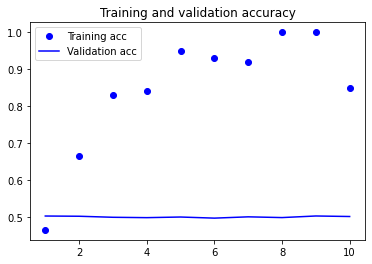

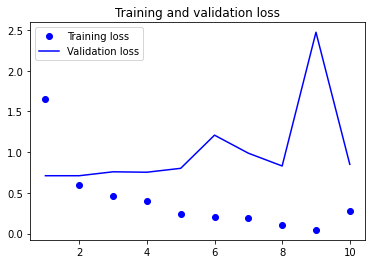

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

사전 훈련된 단어 임베딩을 사용하지 않고 모델 훈련

In [ ]:
# 사전 훈련되 단어 임베딩을 사용하지 않고 같은 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                320032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 162ms/step - loss: 0.6995 - acc: 0.4450 - val_loss: 0.6934 - val_acc: 0.5025
Epoch 2/10
7/7 [==============================

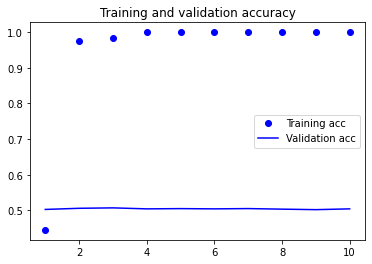

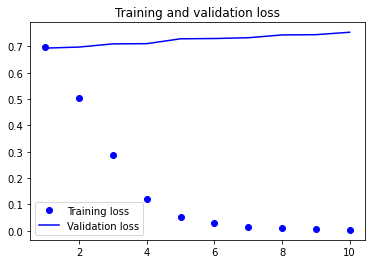

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**테스트 데이터에서 평가**

In [ ]:
# 테스트 데이터 토큰화
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding = 'utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

In [ ]:
# 테스트 데이터에서 모델 평가하기
model.load_weights('/content/drive/MyDrive/2022-1/숙탯/케라스 창시자에게 배우는 딥러닝 code/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.8566 - acc: 0.4979


[0.8565815091133118, 0.4978800117969513]

## 6.2 순환 신경망 이해하기
- 완전 연결 네트워크나 컨브넷은 메모리가 없다. 즉, 네트워크에 주입되는 입력은 개별적으로 처리되고 입력 간에 유지되는 상태가 없다.
- 이런 네트워크로 시퀀스나 시계열 데이터 포인트를 처리하려면 네트워크에 전체 시퀀스를 주이해야 한다. 즉, 전체 시퀀스를 하나의 데이터 포인트로 변환해야 한다.
- 이런 네트워크를 `피드포워드 네트워크(feedforward network)`라고 한다.

- `순환신경망(Recurren Neural Network, RNN)` : 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 `상태(state)`에 저장한다. 내부에 `루프(loop)`를 가진 신경망의 한 종류이다.

- RNN 정방향 계산
  1. (timesteps, input_features)를 입력 받는다.
  2. 이 시퀀스는 타임스텝을 따라서 반복된다.
  3. 현재 상태와 입력을 연결해서 출력을 계산한다.
  4. 그 출력을 다음 스텝의 상태로 설정한다.
  

In [ ]:
# 넘파이로 구현한 간단한 RNN
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타입스텝의 수
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features)) # 입력 데이터: 예제를 위해 생성한 난수

state_t = np.zeros((output_features,))  # 초기 상태: 모두 0인 벡터

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 현재 출력을 얻는다.
  successive_outputs.append(output_t) # 리스트에 결과를 쌓는다.
  state_t = output_t # 아웃풋을 상태에 저장한다.

final_output_sequence = np.stack(successive_outputs, axis = 0)

In [ ]:
final_output_sequence

array([[0.99999994, 0.99999997, 0.99999943, ..., 0.99999999, 0.99999999,
        0.99999999],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

### 6.2.1 케라스의 순환 층

- 넘파이에서 구현한 과정이 실제 케라스의 `SimpleRNN` 층에 해당한다.
- 한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가디로 시퀀스 배치를 처리한다. 즉, (timesteps, input_features) 가 아니라 (batch_size, timesteps, input_features) 크기로 입력을 받는다. 
```
import keras.layers import SimpleRNN
```
- 두 가지 모드로 실행할 수 있다.(return_sequences 매개변수로 선택)
  1. 각 타임스텝의 출력을 모은 전체 시퀀스를 반환
    - (batch_size, timesteps, output_features)
  2. 입력 시퀀스에 대한 마지막 출력만 반환한다.
    - (batch_size, output_features)

In [ ]:
# 마지막 타임스텝의 출력만 얻는 예제
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 전체 상태 시퀀스를 반환
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 여러 개의 순환 층을 차례대로 쌓는 경우, 중간층들이 전체 출력 시퀀스를 반환하도록 설정해야 한다.
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# IMDB 데이터 전처리하기
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test),  '테스트 시퀀스')

print('시퀀스 패딩 (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (sample x time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)


In [ ]:
# Embedding 층과 SimpleRNN 층을 사용한 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 106s 666ms/step - loss: 0.6022 - acc: 0.6629 - val_loss: 0.8621 - val_acc: 0.5632
Epoch 2/10
157/157 [==============================] - 148s 945ms/step - loss: 0.3792 - acc: 0.8406 - val_loss: 0.5484 - val_acc: 0.7640
Epoch 3/10
157/157 [==============================] - 197s 1s/step - loss: 0.2946 - acc: 0.8844 - val_loss: 0.3533 - val_acc: 0.8520
Epoch 4/10
157/157 [==============================] - 116s 738ms/step - loss: 0.2372 - acc: 0.9090 - val_loss: 0.3897 - val_acc: 0.8378
Epoch 5/10
157/157 [==============================] - 157s 1s/step - loss: 0.1898 - acc: 0.9280 - val_loss: 0.3949 - val_acc: 0.8252
Epoch 6/10
157/157 [==============================] - 106s 675ms/step - loss: 0.1438 - acc: 0.9480 - val_loss: 0.4513 - val_acc: 0.7892
Epoch 7/10
157/157 [==============================] - 144s 917ms/step - loss: 0.1093 - acc: 0.9623 - val_loss: 0.4792 - val_acc: 0.7992
Epoch 8/10
157/157 [==============================] - 

- 3장의 모델보다 성능이 좋지 않다.
  - 전체 시퀀스가 아니라 500개의 단어만 사용했다.
  - 다른 이유: SimpleRNN이 텍스트처럼 긴 시퀀스를 처리하는데 적합하지 않다.

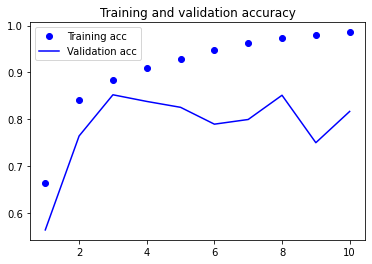

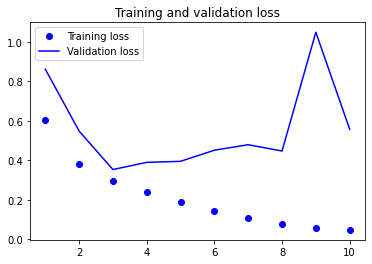

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.2.2 LSTM과 GRU 층 이해하기
- `SimpleRNN`, `LSTM`, `GRU`
- `SimpleRNN`은 이론적으로 시간 t에서 이전의 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없다. 
- `그래디언트 소실 문제(vanishing gradient problem)`

#### **그래디언트 소실 문제(vanishing gradient problem**

- reference
  - https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=laonple&logNo=220507299181
  - https://ydseo.tistory.com/41

**backprogration(역전파)**

1. **cost function**
$$C(w,b) = 1/2n \sum_x ||y(x) - a ||^2$$
  - n : 훈련에 사용하는 입력의 수
  - y(x) : 입력 x를 넣었을 때의 기대출력(target)
  - a : 신경망에 x를 넣었으 때의 실제 출력(predict)
  - cost function : 신경망에 훈련 데이터 x를 가하고, 실제 출력과 기대 출력간의 차에 대한 MSE를 구하는 것.
  - 신경망 학습의 목표 : 훈련 데이터를 이용해 가중치(W)와 바이어스(b)를 변화시키는 과정을 반복적으로 수행하여 cost function이 최소값이 되도록 하는 것

2. **gradient-descent 방법에 기반한 학습**
  - 기울기가 큰 방향으로 W, b를 조정하여 변화시키면 (지역 or 전체) 최소값에 이를 수 있다. 

3. **역전파(backpropagation) 기본 개념**
  - 가중치나 바이어스 값을 아주 작게 변화를 시키면, 출력 쪽에서 생기는 변화 역시 매우 작은 변화가 생긴다. 작은 구간을 바라보았을 때는 선형적인 관계가 있다.
  - 출력에서 생긴 오차를 반대로 입력 쪽으로 전파시키면서 W와 b를 갱신하면 된다.
  - 즉, cost function이 결국 W와 b의 함수로 이루어져있기 때문에 출력 부분에서 시작해서 입력 쪽으로, 즉 역방향으로 cost function에 대한 편미분을 구하고, 얻은 편미분 값을 이용해 W와 b의 값을 갱신시킨다.
  - `역전파(backpropagation)` : 출력부터 반대 방향으로 순차적으로 편미분을 수행해가면서 W와 b값들을 갱신시켜간다. 

4. **뉴런의 재구성**
  - feed forward : 입력이 최종 출력까지 전달되고, 최종 출력단에서 error와 cost function을 구한다.
  - backpropagation : 최종단에서 구한 기대 출력과 실제 출력간의 차(에러)를 반대 방향으로 전파시키면서 각각 넷이나 뉴런의 가중치(W)와 바이어스(b)값을 갱신한다.
  - 신경망이 충분히 학습이 되지 못한 경우는 오차가 클 것이며, 이 큰 오차값을 backpropagation 시키면서 가중치와 바이어스 값을 갱신한다.
  - 훈련데이터에 대해 반복적으로 이 과정을 거치게 되면, 가중치와 바이어스는 훈련데이터에 최적화 딘 값으로 바뀌게 된다.

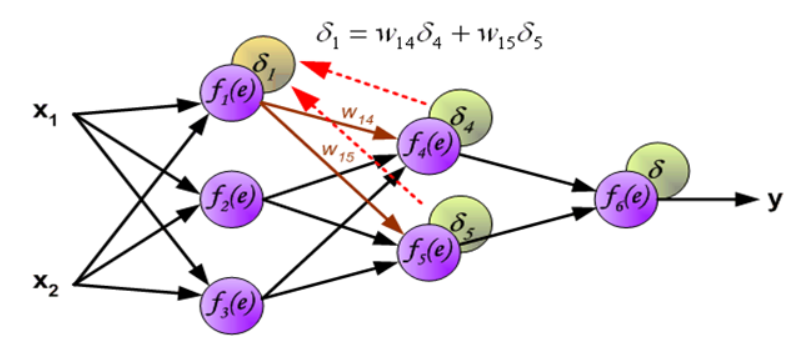

**vanishing gradient problem**
  - 인공신경망을 기울기값을 베이스로 하는 method (backpropagation)로 학습시키려 할 때 발생하는 어려움이다.
  - 특히 네트워크에서 앞쪽 레이어의 파라미터들을 학습시키고, 튜닝하기 어렵게 만든다. 이 문제는 신경망 구조에서 레이어가 늘어날수록 더 악화된다.
  - activation function을 선택하는 문제에 의존적으로 일어나게 된다. sigmoid, tanh들 의 activation function들은 매우 비선형적인 방식으로 그 input을 매우 작은 output range로 짓이겨 넣고(squash) 그 결과 매우 넓은 input space 지역이 극도로 작은 범위로 맵핑되어버린다. 이렇게 되면서 input space에서 큰 변화가 있더라도, output에서는 작은 변화를 보이게 된다. gradient가 작아지기 때문이다. 
  - 이를 해결하기 위한 방법으로 짓이겨 넣는 식(squashing)의 특징을 갖지 않는 acctivation function인 ReLU를 잘 사용하는 편이라 한다.
  - https://cs224d.stanford.edu/notebooks/vanishing_grad_example.html


**LSTM**
- 정보를 여러 타임 스텝에 걸쳐 나르는 방법이 추가됨.
- 스퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위로 올라가 필요한 시점의 타임스텝으로 이동하여 떨군다.
- 나중을 위해 정보를 저장함으로써 처리 과정에서 오래된 시그널이 점차 소실되는 것을 막아준다.
- 타임스템을 가로질러 정보를 나르는 데이터 흐름이 추가 되고, 타임스텝 t에서 이 값을 이동 상태 c_t라고 부른다. 여기서 c는 `이동(carry)`을 의미한다. 입력 연결과 순환 연결(상태)로 부터 이 정보가 합성된다. (완전 연결 층과 같은 변환: 가중치 행렬과 점곱한 후 편향을 더하고 활성화 함수를 적용한다,)
- 다음 이동 상태(c_t+1)가 계산되는 방식
  - 3개의 다른 변환

```
#LSTM 구조의 의사코드
output_t = activtion(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

c_{t+1} = i_t * k_t + c_t * f_t
```

- LSTM 구조의 역할 : 과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결하는 것.

- 해석
  - c_t와 f_t의 곱은 이동을 위한 데이터 흐름에서 관련이 적은 정보를 의도적으로 삭제, i_t와 k_t는 현재에 대한 정보를 제공하고 이동 트랙을 새로운 정보로 업데이트한다.
  - 이런 해석 때문에 f_t의 계산식을 삭제 게이트(forget gate), i_t의 계산식을 입력 게이트(input gate), output_t의 계산식을 출력게이트(output gate)라고 부른다.
  - **하지만 이 연산들이 실제로 하는 일은 연산과 관련된 가충치 행렬에 따라 결정된다. 이 가중치는 엔드-투-엔드 방식으로 학습되며, 훈련의 반복바다 새로 시작되기 때문에 연산에 특정 목적을 부여하는 것은 불가능하다. 즉 이런 해석은 큰 의미가 없다. **
  - 셀의 사양(specification)은 가설 공간을 결정하고, 훈련 시 이 공간에서 가장 좋은 모델 파라미터를 찾는다. 셀의 사양이 셀이 하는 일을 결정하지 않는다. 따라서 RNN 셀을 구성하는 연산 조합은 엔지니어링적인 설계가 아니라 가설 공간의 제약 조건으로 해석하는 것이 낫다.

### 6.2.3 케라스를 사용한 LSTM 예제
- LSRM 층은 출력 차원만 지정하고 다른 매개변수는 케라스의 기본값으로 두었다.


In [ ]:
# 케라스에서 LSTM 층 사용하기
from keras.models import Sequential
from keras.layers import Embedding, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 16s 90ms/step - loss: 0.5118 - acc: 0.7556 - val_loss: 0.3240 - val_acc: 0.8766
Epoch 2/10
157/157 [==============================] - 14s 87ms/step - loss: 0.2925 - acc: 0.8887 - val_loss: 0.9054 - val_acc: 0.7254
Epoch 3/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2387 - acc: 0.9108 - val_loss: 0.2945 - val_acc: 0.8878
Epoch 4/10
157/157 [==============================] - 14s 87ms/step - loss: 0.2048 - acc: 0.9255 - val_loss: 0.7015 - val_acc: 0.7860
Epoch 5/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1826 - acc: 0.9354 - val_loss: 0.2828 - val_acc: 0.8832
Epoch 6/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1653 - acc: 0.9419 - val_loss: 0.3044 - val_acc: 0.8816
Epoch 7/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1472 - acc: 0.9491 - val_loss: 0.4164 - val_acc: 0.8226
Epoch 8/10
157/157 [==============================] - 14s 87ms

**결과**
- SimpleRNN보다 성능이 더 나아졌다.
- 하지만 많은 계산을 사용한 것 치고 획기적이지는 않다.
- 이유
  - 임베딩 차원이나 LSTM 출력 차원 같은 하이퍼파라미터를 전혀 튜닝하지 않았다.
  - 규제가 없다.
  - 리뷰를 전체적으로 길게 분석하는 것(LSTM이 하는 일)은 감성 분류 문제에 도움이 되지 않는다.
    - 이런 문제는 각 리뷰에 어떤 단어가 나타나고 얼마나 등장하는지를 보는 것이 낫다.(첫 번째 완전 연결 네트워크가 사용한 방법)
- 질문응답(question-answering), 기계 번역(machine translation)과 같은 더 복잡한 자연어 처리 문제들에서 LSTM이 잘 작동한다.

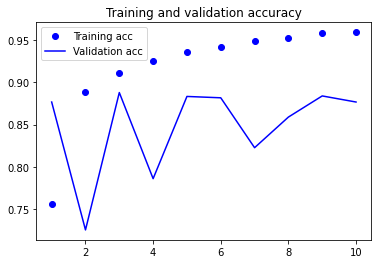

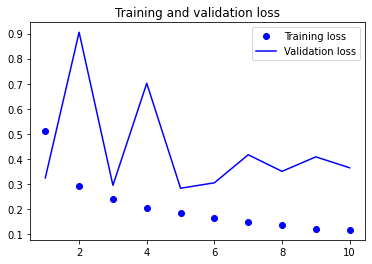

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.3 순환 신경망의 고급 사용법
- `순환 드롭아웃(recurrent dropout)` : 순환 층에서 과대적합을 방지하기 위해 케라스에 내장되어 있는 드롭아웃을 사용한다.
- `스태킹 순환 층(stacking recurrent layer)` : 네트워크의 표현 능력(representational power)을 증가시킨다.
- `양방향 순환 층(bidirectional resurrent layer)` : 순환 네트워크에 같은 정보를 다른 방향으로 주입하여 정확도를 높이고 기억을 좀 더 오래 유지시킨다.

### 6.3.1 기온 예측 문제
- 데이터셋 설명
  - 독일 예나 시의 막스 플랑크 생물지구과학 연구소의 지상 관측소에서 수집한 기온, 기압, 습도, 풍향 등의 14개의 관측치가 10분 간격으로 기록된 데이터.

In [2]:
# 예나 데이터셋 조사하기
import os

data_dir = '/content/deep-learning-with-python-notebooks/datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [3]:
# 데이터 파싱하기
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

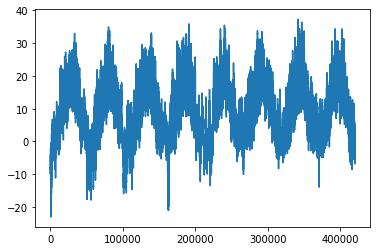

In [4]:
# 시계열 온도 그래프 그리기
from matplotlib import pyplot as plt

temp = float_data[:, 1] # 온도 (섭씨)
plt.plot(range(len(temp)), temp)

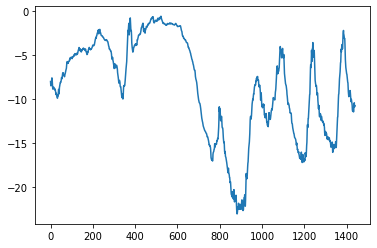

In [5]:
# 처음 10일간 온도 그래프 그리기
plt.plot(range(1440), temp[:1440])

### 6.3.2 데이터 준비
- 문제 정의
  - lookback 타임스텝만큼 이전으로 돌아가서 매 steps 타임스텝 마다 샘플링한다. 이 데이터를 바탕으로 delay 타임스텝 이후의 온도를 예측한다.

- 사용할 변수
  - lookback = 1440 : 10일전 데이터로 돌아간다.
  - steps = 6 : 1시간마다 데이터 포인트 하나를 샘플링한다.
  - delay = 144 : 24시간이 지난 데이터가 타깃이 된다.

- 주입 전 처리할 작업
  - 신경망에 주입할 수 있는 형태로 데이터를 전처리
    - 데이터가 이미 수치형이기 때문에 추가적인 벡터화가 필요하지는 않다. 
    - 각 특성들의 범위가 다르기 때문에, 각 시계열 특성을 개별적으로 정규화해준다.
  - float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터를 만든다.
    - 훈련 샘플 하나는 훈련 데이터 범위 안에서 랜덤하게 선택된 후, 과거 10일치 데이터 포인트 240개를 사용한ㄴ다. 훈련하는 동안 많은 샘플을 추출하기 때문에 모두 넘파이 배열로 만들면 메모리를 많이 차지하고 중복된 포인트도 많다. 
    - 모든 샘플을 각기 메모리에 적재하는 것은 낭비가 심하기 때문에 원본 데이터를 이용하여 그때그때 배치를 만든다. 

- 제너레이터 함수 매개변수
  - `data` : 정규화한 부동 소수 데이터로 이루어진 원본 배열
  - `lookback` : 입력으로 사용하기 위해 거슬러 올라갈 타임 스텝
  - `delay` : 타깃으로 사용할 미래의 타임스텝
  - `min_index` , `max_index` : 추출할 타임스텝의 범위를 지정하기 위한 data 배열의 인덱스, 검증 데이터와 테스트 데이터를 분리하는데 사용됨.
  - `shuffle` : 샘플을 섞을지, 시간 순서대로 추출할지 결정
  - `batch_size`: 배치의 샘플 수
  - `step` : 데이터를 샘플링할 타임스텝 가격, 1시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정

In [6]:
# 데이터 정규화하기
mean = float_data[:200000].mean(axis = 0)
float_data -= mean
std = float_data[:200000].std(axis = 0)
float_data /= std

In [7]:
float_data.shape

(420551, 14)

In [8]:
# 시계열 데이터와 타깃을 반환하는 제너레이터 함수
def generator(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128, step = 6):
  if max_index is None:
    max_index = len(data) - delay - 1 # 지정이 안 되어 있으면 최종 예측 구간을 제외한 마지막 시점
  i = min_index + lookback # 거슬러 올라가야 하니까(과거로 가야하니까) lookback을 더한 초기값 설정
  while 1:
    if shuffle:
      rows = np.random.randint(
          min_index + lookback, max_index, size = batch_size # min_index + lookback, max_index까지 랜덤화된 batch_size 크기의 정수 배열 생성
      )
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback # i에 batch_size을 더했을 때 max_index를 넘어가면 i를 다시 초기화
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows) # batch_size 만큼 i증가 

    samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets = np.zeros((len(rows), ))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [9]:
# 훈련, 검증, 테스트 제너레이터 준비하기
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 0, max_index = 200000, shuffle = True, step = step, batch_size = batch_size)
val_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 200001, max_index = 300000, shuffle = True, step = step, batch_size = batch_size)
test_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 300001, max_index = None, shuffle = True, step = step, batch_size = batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size  # 전체 검증 세트를 순회하기 위해 val_gen 에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size # 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수

### 6.3.3 상식 수준의 기준점
- 정상 여부 확인을 위한 용도
- 나이브 벤치마크

In [ ]:
# 상식적인 기준 모델의 MAE 계산하기 
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:,-1,1] # 가장 마지막 y값
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))

evaluate_naive_method() # 0.29

0.2901377888960855


In [ ]:
# mae를 섭씨 단위로 변환하기
0.29 * std[1]

2.5672247338393395

### 6.3.4 기본적인 머신 러닝 방법


In [ ]:
# 완전 연결 모델을 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1))
model.compile(optimizer = RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
500/500 [==============================] - 17s 34ms/step - loss: 1.2936 - val_loss: 0.6403
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 0.4286 - val_loss: 0.3643
Epoch 3/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2985 - val_loss: 0.3086
Epoch 4/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2679 - val_loss: 0.3041
Epoch 5/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2544 - val_loss: 0.3171
Epoch 6/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2472 - val_loss: 0.3553
Epoch 7/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2411 - val_loss: 0.3165
Epoch 8/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2344 - val_loss: 0.3136
Epoch 9/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2286 - val_loss: 0.3492
Epoch 10/20
500/500 [==============================] - 14s 28ms/step - loss: 0.224

**결과**
- 기준 모델보다 성능이 좋지 않다.
- 문제 해결을 위해 탐색하는 모델의 공간, 즉 가설 공간은 우리가 매개변수로 설정한 2개의 층을 가진 네트워크의 모든 가능한 가중치 조합니다. 이는 매우 복잡하다가. 복잡한 모델 공간에서 해결책을 탐색할 때 간단하고 괜찮은 성능을 내는 모델은 찾지 못할 수 있다.(기술적으로 가설 공간에 해결책이 포함되어 있더라도)

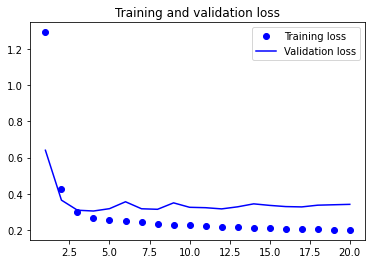

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.5 첫 번째 순환 신경망
- 앞선 모델은 시계열 데이터를 펼쳤기 때문에 입력 데이터에서 시간의 개념을 잃어버렸다.
- 인과 관계와 순서가 의미 있는 시퀀스 데이터를 그대로 사용해보자.-순환 시퀀스 처리 모델
- GRU : LSTM과 같은 원리로 작동하지만 조금 더 간결하고, 계산 비용이 덜 든다. (LSTM 만큼 표현 학습 능력이 높지는 않을 수 있다.)
  - 계산 비용과 표현 학습 능력의 트레이드오프

In [ ]:
# GRU를 사용한 모델을 훈련 및 평가
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
500/500 [==============================] - 35s 66ms/step - loss: 0.3165 - val_loss: 0.2801
Epoch 2/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2861 - val_loss: 0.2704
Epoch 3/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2775 - val_loss: 0.2651
Epoch 4/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2738 - val_loss: 0.2644
Epoch 5/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2679 - val_loss: 0.2713
Epoch 6/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2650 - val_loss: 0.2693
Epoch 7/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2614 - val_loss: 0.2707
Epoch 8/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2596 - val_loss: 0.2729
Epoch 9/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2530 - val_loss: 0.2722
Epoch 10/20
500/500 [==============================] - 33s 66ms/step - loss: 0.247

- 완전 연결 모델보다 성능이 나아졌지만, 기준 모델보다 성능이 좋지 않다.
- 과대적합이 발생했다.

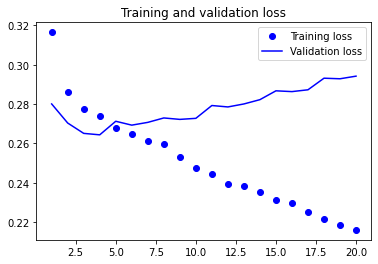

In [ ]:
# 결과 그래프 그리기 - 양방향 RNN에서 거꾸로 훈련시킨 모델과 비교
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.6 과대적합을 감소하기 위해 순환 드롭아웃 사용하기
- 순환신경망에 드롭아웃을 올바르게 적용하는 방법은 간단하지 않다. 순환 층 이전에 드롭아웃을 적용하면 규제에 도움이 되는 것보다 학습에 더 방해되는 것으로 알려져 있었다.
- 2015년 야린 갈에 의해 적절한 방법이 알아내짐.
- 타임스텝마다 랜덤하게 드롭아웃 마스크를 바꾸는 것이 아니라 동일한 드롭아웃 마스크(동일한 유닛의 드롭 패턴)을 모든 타임스텝에 적용해야 한다.
- 모든 타임스텝에 동일한 드롭 아웃 마스크를 적용하면 네트워크가 학습 오차를 타임스텝에 걸쳐 적절하게 전파시킬 것이다.
- 타임스텝마다 랜덤한 드롭아웃 마스크를 적용하면 오차 신호가 전파되는 것을 방해하고 학습 과정에 해를 끼친다.

- 케라스에 있는 모든 순환 층은 2개의 드롭아웃 매개변수를 가진다.
  - `dropout` : 층의 입력에 대한 드롭아웃 비율을 정하는 부동 소수 값
  - `recurrent_dropout` : 순환상태의 드롭아웃 비율
  

In [ ]:
# 드롭아웃 규제된 GRU를 사용한 모델을 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 40, validation_data = val_gen, validation_steps = val_steps)

Epoch 1/40
500/500 [==============================] - 124s 248ms/step - loss: 0.3395 - val_loss: 0.2812
Epoch 2/40
500/500 [==============================] - 123s 247ms/step - loss: 0.3138 - val_loss: 0.2721
Epoch 3/40
500/500 [==============================] - 123s 247ms/step - loss: 0.3080 - val_loss: 0.2682
Epoch 4/40
500/500 [==============================] - 123s 247ms/step - loss: 0.3045 - val_loss: 0.2670
Epoch 5/40
500/500 [==============================] - 123s 247ms/step - loss: 0.3012 - val_loss: 0.2713
Epoch 6/40
500/500 [==============================] - 123s 247ms/step - loss: 0.3007 - val_loss: 0.2689
Epoch 7/40
500/500 [==============================] - 123s 247ms/step - loss: 0.2968 - val_loss: 0.2657
Epoch 8/40
500/500 [==============================] - 123s 247ms/step - loss: 0.2953 - val_loss: 0.2677
Epoch 9/40
500/500 [==============================] - 123s 247ms/step - loss: 0.2909 - val_loss: 0.2628
Epoch 10/40
500/500 [==============================] - 123s 247m

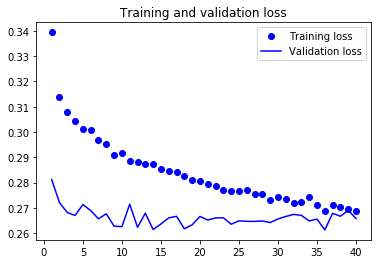

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.7 스태킹 순환 층
- 순환 층을 더 쌓는다.
- 순환 층을 차례대로 쌓으려면 모든 중간층은 마지막 타임스텝 출력만 아니고 전체 시퀀스(3D 텐서)를 출력해야 한다.
  - `return_sequence = True`

In [ ]:
# 드롭아웃으로 규제하고 스태킹한 GRU 모델을 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout = 0.1, recurrent_dropout = 0.5, return_suqeunces = True, input_shape = (None, float_data.shape[-1])))
model.add(layers.GRU(64, activation = 'relu', dropout=0.1, recurrent_dropout = 0.5))
model.add(layers.Dense(1))
model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 40, validation_data = val_gen, validation_steps = val_steps)

Epoch 1/40
500/500 [==============================] - 250s 499ms/step - loss: 0.3360 - val_loss: 0.2779
Epoch 2/40
500/500 [==============================] - 248s 497ms/step - loss: 0.3140 - val_loss: 0.2765
Epoch 3/40
500/500 [==============================] - 248s 497ms/step - loss: 0.3067 - val_loss: 0.2697
Epoch 4/40
500/500 [==============================] - 248s 497ms/step - loss: 0.3032 - val_loss: 0.2728
Epoch 5/40
500/500 [==============================] - 248s 497ms/step - loss: 0.2981 - val_loss: 0.2650
Epoch 6/40
500/500 [==============================] - 248s 497ms/step - loss: 0.2964 - val_loss: 0.2705
Epoch 7/40
500/500 [==============================] - 249s 497ms/step - loss: 0.2911 - val_loss: 0.2655
Epoch 8/40
500/500 [==============================] - 249s 497ms/step - loss: 0.2896 - val_loss: 0.2690
Epoch 9/40
500/500 [==============================] - 249s 498ms/step - loss: 0.2866 - val_loss: 0.2664
Epoch 10/40
500/500 [==============================] - 249s 497m

층을 추가하여 성능 조금 향상시켰지만 크지 않다.
  - 아직 충분히 과대적합을 만들지 못했기 때문에 검증 손실 향상시키기 위해 층의 크기를 늘릴 수 있다. 하지만 적지 않은 계산 비용이 추가된다.
  - 층을 추가한 만큼 도움이 되지 않았으므로, 여기서는 네트워크의 용량을 늘리는 것이 도움이 되지 않는다고 볼 수 있다.

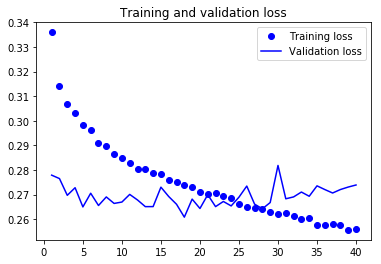

In [ ]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.3.8 양방향 RNN 사용하기
- 자연어 처리 문제
  - 문장을 이해하는 데 단어의 중요성은 단어가 문장 어디에 놓여 있는지에 따라 결정되지 않는다.
  - 순서를 뒤집어 처리하는 것이 시간 순서대로 처리는 것과 거의 동일하게 잘 작동한다.
  - 양방향 RNN이 효과적일 수 있다. 
- 시계열 문제
  - 시간 순서대로 데이터를 처리하는 것이 중요하다.
  - 기본적인 GRU 층은 먼 과거보다 최근 내용을 더 잘 기억한다.
  - 시간 순서대로 처리하는 네트워크가 거꾸로 처리하는 것보다 성능이 더 좋다.
  - 양방향 RNN이 잘 작동하지 않는다.

In [14]:
# 시계열 데이터와 타깃을 반대로 제너레이터 함수
def generator(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128, step = 6):
  if max_index is None:
    max_index = len(data) - delay - 1 # 지정이 안 되어 있으면 최종 예측 구간을 제외한 마지막 시점
  i = min_index + lookback # 거슬러 올라가야 하니까(과거로 가야하니까) lookback을 더한 초기값 설정
  while 1:
    if shuffle:
      rows = np.random.randint(
          min_index + lookback, max_index, size = batch_size # min_index + lookback, max_index까지 랜덤화된 batch_size 크기의 정수 배열 생성
      )
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback # i에 batch_size을 더했을 때 max_index를 넘어가면 i를 다시 초기화
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows) # batch_size 만큼 i증가 

    samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets = np.zeros((len(rows), ))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples[:,::-1,:], targets

In [15]:
# 훈련, 검증, 테스트 제너레이터 준비하기
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 0, max_index = 200000, shuffle = True, step = step, batch_size = batch_size)
val_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 200001, max_index = 300000, shuffle = True, step = step, batch_size = batch_size)
test_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 300001, max_index = None, shuffle = True, step = step, batch_size = batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size  # 전체 검증 세트를 순회하기 위해 val_gen 에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size # 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수

In [16]:
# 거꾸로 출력된 훈련데이터와 GRU를 사용한 모델을 훈련 및 평가
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
500/500 [==============================] - 38s 68ms/step - loss: 0.4824 - val_loss: 0.4776
Epoch 2/20
500/500 [==============================] - 33s 66ms/step - loss: 0.4313 - val_loss: 0.4613
Epoch 3/20
500/500 [==============================] - 33s 65ms/step - loss: 0.3726 - val_loss: 0.4434
Epoch 4/20
500/500 [==============================] - 33s 66ms/step - loss: 0.3373 - val_loss: 0.3820
Epoch 5/20
500/500 [==============================] - 33s 65ms/step - loss: 0.3150 - val_loss: 0.3868
Epoch 6/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2921 - val_loss: 0.3401
Epoch 7/20
500/500 [==============================] - 33s 65ms/step - loss: 0.2751 - val_loss: 0.3291
Epoch 8/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2647 - val_loss: 0.3345
Epoch 9/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2567 - val_loss: 0.3290
Epoch 10/20
500/500 [==============================] - 33s 66ms/step - loss: 0.249

- 순방향 GRU 모델과 비교해보았을 때 성능이 나쁘다.

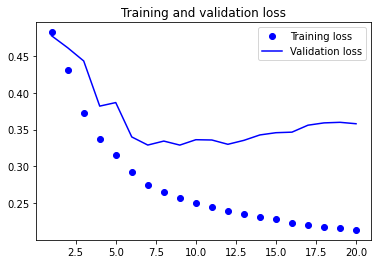

In [17]:
# 결과 그래프 그리기 - 위의 GRU 모델의 결과와 비교
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**IMDB 데이터셋(리뷰 감성 분류)**

In [19]:
# 거꾸로 된 시퀀스를 사용하여 LSTM을 훈련하고 평가하기
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) # 데이터 로드
x_train = [x[::-1] for x in x_train]  # 시퀀스를 뒤집는다.
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen = maxlen) # 시퀀스에 패딩 추가
x_test = sequence.pad_sequences(x_test, maxlen = maxlen) 

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 14s 75ms/step - loss: 0.4868 - acc: 0.7697 - val_loss: 0.4493 - val_acc: 0.8334
Epoch 2/10
157/157 [==============================] - 11s 69ms/step - loss: 0.3112 - acc: 0.8802 - val_loss: 0.3258 - val_acc: 0.8636
Epoch 3/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2497 - acc: 0.9082 - val_loss: 0.3234 - val_acc: 0.8632
Epoch 4/10
157/157 [==============================] - 11s 67ms/step - loss: 0.2239 - acc: 0.9201 - val_loss: 0.3301 - val_acc: 0.8750
Epoch 5/10
157/157 [==============================] - 10s 67ms/step - loss: 0.1862 - acc: 0.9345 - val_loss: 0.3466 - val_acc: 0.8816
Epoch 6/10
157/157 [==============================] - 10s 67ms/step - loss: 0.1700 - acc: 0.9397 - val_loss: 0.3617 - val_acc: 0.8772
Epoch 7/10
157/157 [==============================] - 11s 67ms/step - loss: 0.1582 - acc: 0.9481 - val_loss: 0.3511 - val_acc: 0.8726
Epoch 8/10
157/157 [==============================] - 11s 67ms

- 위에서의 결과와 비슷하다(성능이 더 나빠지지도 좋아지지도 않았다)
- 오히려 더 안정적으로 보인다..

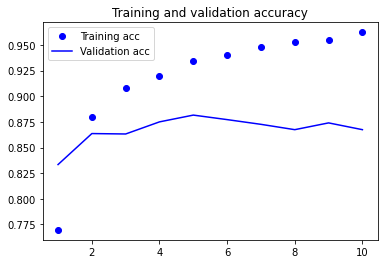

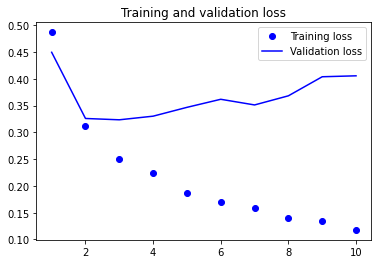

In [20]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- `Bidirectional`층
  - 케라스에서 양방향 층을 만듦.
  - Bidirectional 클래스는 전달받은 순환 층으로 새로운 두 번째 객체를 만든다. 하나는 시간 순서대로 입력 시퀀스를 처리하고, 다른 하나는 반대 순서로 입력 시퀀스를 처리한다.

In [21]:
# 양방향 LSTM을 훈련하고 평가하기
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 33s 188ms/step - loss: 0.5408 - acc: 0.7258 - val_loss: 0.5896 - val_acc: 0.6924
Epoch 2/10
157/157 [==============================] - 29s 183ms/step - loss: 0.3298 - acc: 0.8742 - val_loss: 0.3799 - val_acc: 0.8750
Epoch 3/10
157/157 [==============================] - 29s 183ms/step - loss: 0.2643 - acc: 0.9048 - val_loss: 0.2913 - val_acc: 0.8882
Epoch 4/10
157/157 [==============================] - 29s 183ms/step - loss: 0.2260 - acc: 0.9201 - val_loss: 0.3119 - val_acc: 0.8872
Epoch 5/10
157/157 [==============================] - 29s 183ms/step - loss: 0.2045 - acc: 0.9273 - val_loss: 0.3006 - val_acc: 0.8872
Epoch 6/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1775 - acc: 0.9395 - val_loss: 0.3742 - val_acc: 0.8820
Epoch 7/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1702 - acc: 0.9426 - val_loss: 0.3831 - val_acc: 0.8726
Epoch 8/10
157/157 [==============================] - 2

- 두 방향의 결과를 합치자 성능이 좋아졌다.
- 두 모델이 서로 못 보는 정보가 합쳐짐으로써 생긴 결과로 보인다.

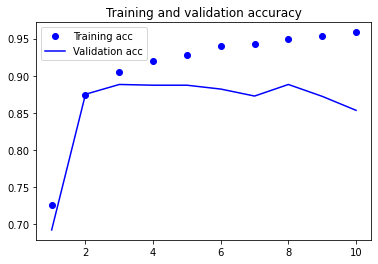

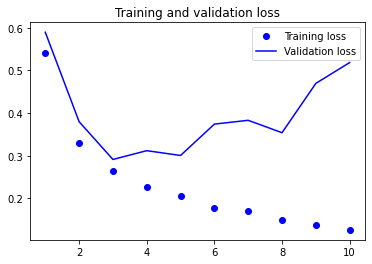

In [22]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**온도 예측 문제에 양방향 GRU 적용하기**

In [23]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 40, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/40
500/500 [==============================] - 72s 137ms/step - loss: 0.2956 - val_loss: 0.2722
Epoch 2/40
500/500 [==============================] - 66s 133ms/step - loss: 0.2757 - val_loss: 0.2663
Epoch 3/40
500/500 [==============================] - 67s 133ms/step - loss: 0.2687 - val_loss: 0.2677
Epoch 4/40
500/500 [==============================] - 66s 133ms/step - loss: 0.2636 - val_loss: 0.2641
Epoch 5/40
500/500 [==============================] - 66s 133ms/step - loss: 0.2579 - val_loss: 0.2701
Epoch 6/40
500/500 [==============================] - 66s 132ms/step - loss: 0.2526 - val_loss: 0.2646
Epoch 7/40
500/500 [==============================] - 66s 132ms/step - loss: 0.2480 - val_loss: 0.2692
Epoch 8/40
500/500 [==============================] - 66s 132ms/step - loss: 0.2429 - val_loss: 0.2754
Epoch 9/40
500/500 [==============================] - 66s 132ms/step - loss: 0.2344 - val_loss: 0.2754
Epoch 10/40
500/500 [==============================] - 66s 132ms/step - l

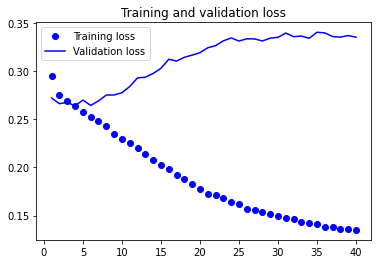

In [24]:
# 결과 그래프 그리기 - 위의 GRU 모델의 결과와 비교
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**온도 예측 문제 성능 향상을 위해 더 해볼만한 것들**
- 스태킹한 각 순환 층의 유닛 수를 조정한다.
- RMSprop 옵티마이저가 사용한 학습률을 조정한다.
- GRU 대신 LSTM 층을 사용한다.
- 순환 층 위에 용량이 큰 완전 연결된 회귀 층을 사용한다. 즉, 유닛 수가 많은 Dense 층 한 개 또는 여러 개의 Dense층을 스태킹한다.
- 최종적으로 test data에서의 성능을 측정한다.

**6.3절 정리**
- 새로운 문제를 해결할 때는 선택한 지표에 대해 상식 수준의 기준점을 설정하는 것이 좋다(나이브 벤치마크)
- 계산 비용을 추가할지 판단하기 위해 비용이 비싼 모델 전에 간단한 모델을 시도한다.
- 시간 순서가 중요한 데이터가 있다면 순환 층이 적합하다. 시계열 데이터를 펼쳐서 처리하는 모델의 성능을 쉽게 앞지를 수 있다.
- 순환 네트워크에 드롭아웃을 사용하려면 타임스텝 동안 일정한 드롭아웃 마스크와 순환 드롭아웃 마스크를 사용해야 한다. 둘 다 케라스 순환 층에 포함되어 있으며, 순환 층에 있는 `dropout`과 `recurrent_dropout` 매개변수를 사용하면 된다.
- 스태킹 RNN은 단일 RNN 층보다 더 강력한 표현 능력을 제공한다. 하지만 계산 비용이 많이 들기 때문에 항상 시도할 가치가 있지는 않다. (기계 번역 같은) 복잡한 문제에서는 확실히 도움이 되지만 작고 간단한 문제에서는 항상 그렇지는 않다.
- 양쪽 방향으로 시퀀스를 바라보는 양방향 RNN은 자연어 처리 문제에 유용하다. 하지만 최근 정보가 오래된 것보다 훨씬 의미있는 시퀀스 데이터에서는 잘 작동하지 않는다.

**순환 어텐션(attention)**
- https://wikidocs.net/22893
- seq2seq모델 : 인코더에서 `입력 시퀀스`를 `컨텍스트 벡터`라는 하나의 고정된 크기의 벡터 표현으로 압축하고, 디코더는 이 컨텍스트 벡터를 통해 `출력 시퀀스`를 만드는 모델
  - 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생한다.
  - RNN의 고질적인 문제인 기울기 소실(vanishing gradient)문제가 존재한다. 
  - 기계 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상으로 나타나게 된다.

- 어텐션(attention)
  - 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위해 등장한 기법
  - 디코더에서 출력 단어를 예측하는 매 시점(time step)마다 인코더에서의 전체 입력 문장을 다시 한 번 참고한다. 단, 동일한 비율이 아닌 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 본다.
  - 자세한 설명은 상단 링크 참조


**시퀀스 마스킹(sequence masking)**
- https://www.tensorflow.org/guide/keras/masking_and_padding?hl=ko

## 6.4 컨브넷을 사용한 시퀀스 처리

### 6.4.1 시퀀스 데이터를 위한 1D 합성곱 이해하기
- 1D 패치(부분 시퀀스)를 추출하여 1D 합성곱을 적용한다.
- 1D 합성곱 층은 시퀀스에 있는 지역 패턴을 인식할 수 있다.
- 동일한 변환이 모든 패치에 적용되기 때문에 특정 위치에서 학습한 패턴을 나중에 다른 위치에서 인식할 수 있다. `이동 불변성(translation invariant)`를 제공하게 된다.
- 따라서 단어가 입력 시퀀스의 어느 문장에 있더라도 인식할 수 있으며 문자 수준의 1D 컨브넷은 단어 형태학에 관해 학습할 수 있다.

### 6.4.2 시퀀스 데이터를 위한 1D 풀링
- 다운샘플링
- 2D 컨브넷과 마찬가지로 1D 입력의 길이를 줄이기 위해 사용한다.
- 최댓값(최대 풀링), 평균값(평균 풀링)을 출력

### 6.4.3 1D 컨브넷 구현
- 1D 컨브넷은 `Conv1D` 층을 사용하여 구현한다.
  - (samples, time, features) 크기의 3D 텐서를 입력받고, 비슷한 형태의 3D텐서를 반환한다.
  - 합성곱 윈도우는 시간축의 1D 윈도우 이다. 즉 입력 텐서의 두 번째 축이다.

- `Conv1D`와 `MaxPooling1D`층을 쌓고 전역 풀링 층이나 Flatten 층으로 마친다. 
  - 이 구조는 3D 입력을 2D 출력으로 바꾸므로 분류나 회귀를 위해 모델에 하나 이상의 Dense 층을 추가할 수 있다.
  - `GlobalAveragePooling1D`, `GlobalMaxPooling1D` 풀링은 (samples, timesteps, features) 크기의 텐서를 입력으로 받고 (samples, features) 크기의 텐서를 출력한다. 즉, 시간 축 전체에 풀링을 적용한다. 
  - `GlobalAveragePooling2D`, `GlobalMaxPooling2D` 풀링은 (samples, height, width, channels) 크기의 텐서를 입력으로 받고 (samples, channels) 크기의 텐서를 출력한다.

- 큰 합성곱 윈도우를 사용할 수 있다. 2D 합성곱 층에서 3*3 합성곱 윈도우는 9개의 특성을 고려한다. 1D 합성곱 층에서 크기가 3인 윈도우는 3개의 특성만 고려한다. 따라서, 7이나 9 크기의 윈도우를 사용할 수 있다.

**IMDB 감성 분류 문제에 적용**

In [32]:
# IMDB 데이터 전처리하기
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (sample x time')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train 크기: ', x_train.shape)
print('x_test 크기: ', x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (sample x time
x_train 크기:  (25000, 500)
x_test 크기:  (25000, 500)


In [36]:
# IMDB 데이터에 1D 컨브넷을 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_7 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 1)                

In [37]:
model.compile(optimizer = RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_split = 0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
157/157 [==============================] - 5s 23ms/step - loss: 0.8927 - acc: 0.5068 - val_loss: 0.6900 - val_acc: 0.5176
Epoch 2/30
157/157 [==============================] - 4s 23ms/step - loss: 0.6729 - acc: 0.6411 - val_loss: 0.6730 - val_acc: 0.5866
Epoch 3/30
157/157 [==============================] - 4s 26ms/step - loss: 0.6356 - acc: 0.7521 - val_loss: 0.6312 - val_acc: 0.7126
Epoch 4/30
157/157 [==============================] - 3s 22ms/step - loss: 0.5636 - acc: 0.8046 - val_loss: 0.5309 - val_acc: 0.7876
Epoch 5/30
157/157 [==============================] - 3s 22ms/step - loss: 0.4381 - acc: 0.8414 - val_loss: 0.4213 - val_acc: 0.8316
Epoch 6/30
157/157 [==============================] - 3s 22ms/step - loss: 0.3566 - acc: 0.8698 - val_loss: 0.3887 - val_acc: 0.8510
Epoch 7/30
157/157 [==============================] - 3s 22ms/step - loss: 0.3051 - acc: 0.8931 - val_loss: 0.3999 - val_acc: 0.8586
Epoch 8/30
157/157 [==============================] - 4s 22ms/step - 

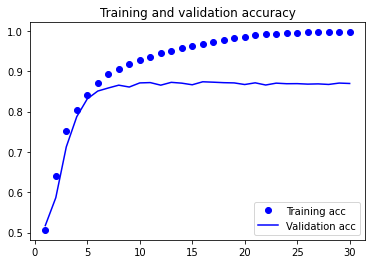

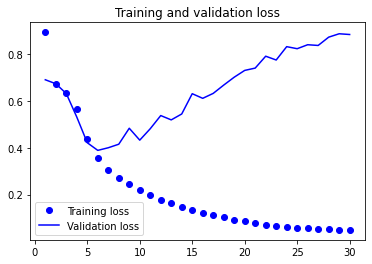

In [38]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6.4.4 CNN과 RNN을 연결하여 긴 시퀀스를 처리하기
- 1D 컨브넷은 입력 패치를 독립적으로 처리하기 때문에 RNN과 달리 (합성곱 윈도우 크기의 범위를 넘어서는) 타임스텝의 순서에 민감하지 않다.
- 물론 장기간 패턴 인식을 위해 많은 합성곱 층과 풀링 층을 쌓으면 상위 층에서는 원본 입력에서 긴 범위를 보게 된다. 하지만 이런 방법은 순서를 감지하기에 부족하다.


**온도 예측 문제에 1D 컨브넷 적용하기**

In [41]:
# 시계열 데이터와 타깃을 반환하는 제너레이터 함수
def generator(data, lookback, delay, min_index, max_index, shuffle = False, batch_size = 128, step = 6):
  if max_index is None:
    max_index = len(data) - delay - 1 # 지정이 안 되어 있으면 최종 예측 구간을 제외한 마지막 시점
  i = min_index + lookback # 거슬러 올라가야 하니까(과거로 가야하니까) lookback을 더한 초기값 설정
  while 1:
    if shuffle:
      rows = np.random.randint(
          min_index + lookback, max_index, size = batch_size # min_index + lookback, max_index까지 랜덤화된 batch_size 크기의 정수 배열 생성
      )
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback # i에 batch_size을 더했을 때 max_index를 넘어가면 i를 다시 초기화
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows) # batch_size 만큼 i증가 

    samples = np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets = np.zeros((len(rows), ))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [42]:
# 훈련, 검증, 테스트 제너레이터 준비하기
lookback = 1440
step = 3
delay = 144
batch_size = 128
train_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 0, max_index = 200000, shuffle = True, step = step, batch_size = batch_size)
val_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 200001, max_index = 300000, shuffle = True, step = step, batch_size = batch_size)
test_gen = generator(float_data, lookback = lookback, delay = delay, min_index = 300001, max_index = None, shuffle = True, step = step, batch_size = batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size  # 전체 검증 세트를 순회하기 위해 val_gen 에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size # 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수

In [43]:
# 예나 데이터에서 1D 컨브넷을 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation = 'relu', input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, None, 32)          2272      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          5152      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, None, 32)          5152      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)             

In [45]:
model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
500/500 [==============================] - 29s 55ms/step - loss: 0.4151 - val_loss: 0.4494
Epoch 2/20
500/500 [==============================] - 28s 56ms/step - loss: 0.3732 - val_loss: 0.4585
Epoch 3/20
500/500 [==============================] - 29s 57ms/step - loss: 0.3583 - val_loss: 0.4569
Epoch 4/20
500/500 [==============================] - 28s 56ms/step - loss: 0.3461 - val_loss: 0.4521
Epoch 5/20
500/500 [==============================] - 35s 69ms/step - loss: 0.3406 - val_loss: 0.4749
Epoch 6/20
500/500 [==============================] - 29s 58ms/step - loss: 0.3341 - val_loss: 0.4619
Epoch 7/20
500/500 [==============================] - 29s 59ms/step - loss: 0.3284 - val_loss: 0.4611
Epoch 8/20
500/500 [==============================] - 34s 69ms/step - loss: 0.3231 - val_loss: 0.4639
Epoch 9/20
500/500 [==============================] - 29s 59ms/step - loss: 0.3186 - val_loss: 0.4753
Epoch 10/20
500/500 [==============================] - 29s 58ms/step - loss: 0.317

- 성능이 좋지 않다.

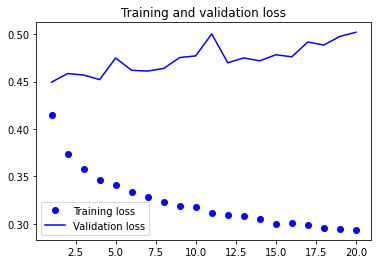

In [46]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 최근 데이터 포인트일수록 오래된 데이터 포인트와는 다르게 해석해야 하기 때문에 컨브넷이 의미있는 결과를 만들지 못한다.
- 컨브넷의 속도와 경량함을 RNN의 순서 감지 능력과 결합하는 한 가지 전략은 1D 컨브넷을 RNN이전에 전처리 단계로 사용하는 것이다.
  - 이는 수천 개의 스텝을 가진 시퀀스같이 RNN으로 처리하기에는 현실적으로 너무 긴 시퀀스를 다룰 때 특별히 도움이 된다.
  - 컨브넷이 긴 입력 시퀀스를 더 짧은 고수준 특성의 시퀀스로 변환한다.
  - 추출된 특성의 시퀀스는 RNN 파트의 입력이 된다.
  - 훨씬 긴 시퀀스를 다룰 수 있으므로 더 오래 전 데이터를 바라보거나(lookback 매개변수를 증가), 시계열 데이터를 더 촘촘히 바라볼 수 있다.(step 매개변수를 증가)

In [50]:
# 1D 합성곱과 GRU 층을 연결한 모델
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation = 'relu', input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.GRU(32, dropout = 0.1, recurrent_dropout = 0.5))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, None, 32)          2272      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, None, 32)          5152      
                                                                 
 gru_4 (GRU)                 (None, 32)                6336      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________

In [51]:
model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen, steps_per_epoch = 500, epochs = 20, validation_data = val_gen, validation_steps = val_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
500/500 [==============================] - 535s 1s/step - loss: 0.3288 - val_loss: 0.2854
Epoch 2/20
500/500 [==============================] - 530s 1s/step - loss: 0.2931 - val_loss: 0.2805
Epoch 3/20
500/500 [==============================] - 528s 1s/step - loss: 0.2792 - val_loss: 0.2746
Epoch 4/20
500/500 [==============================] - 518s 1s/step - loss: 0.2699 - val_loss: 0.2820
Epoch 5/20
500/500 [==============================] - 520s 1s/step - loss: 0.2616 - val_loss: 0.2771
Epoch 6/20
500/500 [==============================] - 518s 1s/step - loss: 0.2546 - val_loss: 0.2798
Epoch 7/20
500/500 [==============================] - 516s 1s/step - loss: 0.2494 - val_loss: 0.2807
Epoch 8/20
500/500 [==============================] - 517s 1s/step - loss: 0.2415 - val_loss: 0.2861
Epoch 9/20
500/500 [==============================] - 518s 1s/step - loss: 0.2383 - val_loss: 0.2870
Epoch 10/20
500/500 [==============================] - 520s 1s/step - loss: 0.2319 - val_lo

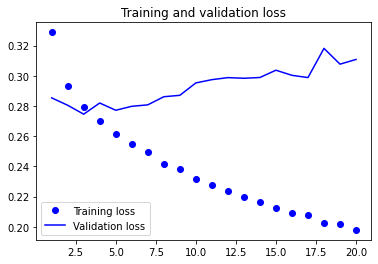

In [52]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) 

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()